### 수학통계적 방법으로 선형회귀(linear regression) 풀기

##### Linear Regression  (월수익과 카드사용액의 관계)
#### X(월수익), Y(카드사용액) 관계를 일차함수로 표현(모델링)하기. 
* 일차함수의 기울기는  (X,Y의 공분산) / (X의 분산)으로 구할 수 있다.
* 일자: 2018/01
* 저자: 한대희 daehee@mycampus.io


In [0]:
import math
import matplotlib.pyplot as plt

income = [100,200,300,400,500] # 월수익
card = [30, 57, 76, 140, 197] # 카드사용금액

In [6]:
for x, y in zip(income, card):
  print(x, y)

100 30
200 57
300 76
400 140
500 197


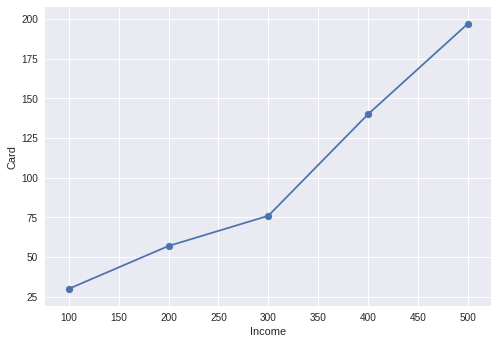

In [7]:
fig, ax = plt.subplots()
ax.plot(income, card)
ax.set_xlabel('Income')
ax.set_ylabel('Card')
ax.scatter(income, card)
plt.show()

### 평균 (mean) 구하기

In [8]:
mean_income = float(sum(income) / len(income))
mean_card = sum(card) / len(card)
print('MEAN', mean_income, mean_card)


MEAN 300.0 100.0


### 분산값 구하기

In [9]:
vars = [(x-mean_income)*(x - mean_income) for x in income]
variance_income = sum(vars) / len(vars)
print('VAR', variance_income)

VAR 20000.0


### 공분산(covariance)구하기

In [10]:
covars = [ (x-mean_income) * (y - mean_card) for x, y in zip(income, card)]
covariance = sum(covars) /  len(covars)
print('COV', covariance)

COV 8340.0


### 통계적 방법으로 기울기(W), y절편(B)구하기

In [11]:
# W = (X,Y의 covariance) / (X의 분산)
W = float(covariance / variance_income)
print('W', W)


W 0.417


In [12]:
# y = B + W * X
# B = Y - W * X
B = mean_card - W * mean_income
print('B', B)

B -25.099999999999994


### 통계적 방법으로 도출한 모델로 카드사용량 예측하기

In [13]:
card_from_model = [B + W * x for x in income] 
print('원데이터 출력값', card)
print('모델의 출력값', card_from_model)

원데이터 출력값 [30, 57, 76, 140, 197]
모델의 출력값 [16.6, 58.3, 100.0, 141.7, 183.4]


In [14]:
for y1, y2 in zip(card, card_from_model):
    print(y1, y2)

30 16.6
57 58.3
76 100.0
140 141.7
197 183.4


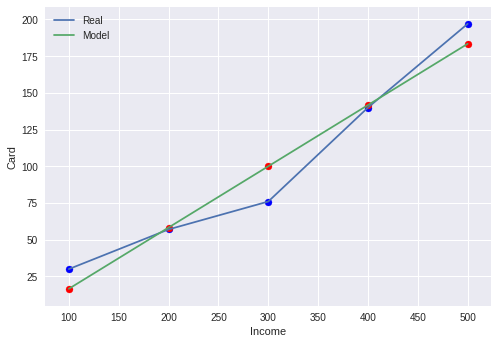

In [15]:
fig, ax = plt.subplots()
ax.plot(income, card, label='Real')
ax.plot(income, card_from_model, label='Model')
ax.scatter(income, card, c='blue')
ax.scatter(income, card_from_model, c='red')
ax.set_xlabel('Income')
ax.set_ylabel('Card')
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

def linear_reg(X, Y, name=''):  
  X = X.reshape((-1, 1))
  model = LinearRegression()
  model.fit(X, Y)
  # model.coef_ -- 기울기
  # model.intercept_ -- Y절편(bias)
  print('Model Parameters:', model.coef_, model.intercept_)
  Y2 = model.predict(X)
  rmse_v = rmse(Y, Y2)
  print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y2))
  print('Variance score: %.2f' % r2_score(Y, Y2))
  print("RMSE of %s: %.2f" % (name, rmse_v))

In [17]:
linear_reg(np.array(income), np.array(card), '0')



Model Parameters: [0.417] -25.099999999999966
Mean squared error: 189.02
Variance score: 0.95
RMSE of 0: 13.75


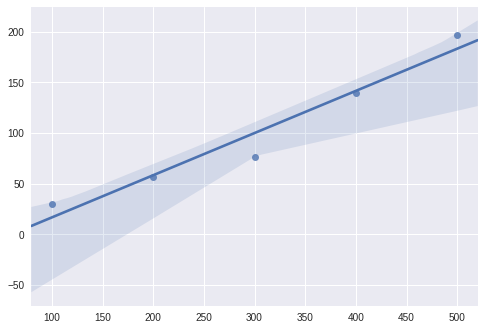

In [20]:
import seaborn as sns
sns.regplot(np.array(income), np.array(card))